# **Clustering**

# K-Means

K-Means algorithm is a centroid based clustering algorithm where the sum of distances of points from the centroid of each cluster is minimized. The final output is a set of K clusters .ie. the cluster assigned to each point and the K centroids of the clusters.

### The Algorithm
 >1.   Initialize K centroids to K points randomly and set each point's initial cluster as the centroid closest to it.
2.   While the clusers are changing - \\
a. Assign the new centroids as the centroids of the points which have the same assigned cluster. \\
b. Assign the new clusters to the points as the closest centroid.
3. Return the assignments and the centroids.





### Implementation of KMeans and testing on Synthetic Datasets

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
# Generating Synthetic Data

k=2
color=["darkturquoise","darkorange","teal","darkviolet","tomato", "yellowgreen","hotpink","gold"]

X,_=make_blobs(n_samples=500, n_features=2, centers=k, random_state=10)
print("Shape = " + str(X.shape))

print("Sample:")
print(X[:5])

print(X)
print('second')
print(_)

Shape = (500, 2)
Sample:
[[ 5.83801528 -9.29715058]
 [ 5.67102739 -9.76225984]
 [ 3.15598083  5.95298368]
 [ 3.87586762  5.94663718]
 [ 3.94478532  4.85652467]]
[[  5.83801528  -9.29715058]
 [  5.67102739  -9.76225984]
 [  3.15598083   5.95298368]
 [  3.87586762   5.94663718]
 [  3.94478532   4.85652467]
 [  2.82983681   4.85628288]
 [  4.99059695  -9.04869246]
 [  5.31414039  -9.94714146]
 [  2.37830662   4.78915634]
 [  2.54234378   5.46906286]
 [  3.64313269   5.42712386]
 [  3.88101257  -9.59334486]
 [  6.04666737 -10.65352872]
 [  1.65611544   5.46167742]
 [  3.74596695  -8.90825282]
 [  7.03787016  -9.34562175]
 [  5.88730132  -8.922587  ]
 [  3.24365815   4.46320246]
 [  2.54406041   6.89173024]
 [  2.44257249   6.84606548]
 [  4.94431973  -9.4953734 ]
 [  4.4198443   -9.84249464]
 [  4.71934142  -9.03829618]
 [  6.1858842   -9.61888801]
 [  5.18940868  -9.52767586]
 [  6.40648699 -11.98053303]
 [  6.97157463 -10.27664867]
 [ -0.14303652   5.08562208]
 [  4.99810946 -10.34037685

In [3]:
#DEFINE ALL THE FUNCTIONS & VARIABLES WE NEED TO DO CLUSTERING
#Create an empty dictionary to store the cluster name, centroid and points associated with the cluster.
clusters={}

def initializeClusterCentroids():
  #For each cluster, initialize its properties
  for i in range(k):
      center = np.random.randint(-8, 10, size= (X.shape[1],), )
      points = []

      cluster = {
          'center' : center,
          'points' : points,
          'color' : color[i]
      }
      clusters[i] = cluster #looping over clusters dictionary

#Calculate euclidean distance between v1 and v2
def distance(v1, v2):
    return np.sum((v2-v1)**2)**0.5

def assignPointsToCluster(clusters, X):
    for ix in range(X.shape[0]):#iterate for all datapoints

        #Foe each datapoint, find the distance to k centroids
        distance_of_i = []
        for kx in range(k):
            d = distance(X[ix], clusters[kx]['center']) #we have find distance b/w
            #all the point with all the five (k) cluster centers
            distance_of_i.append(d)
        
        #Based on the distances to k centroid, pick which cluster to assign it to
        #here we want find the minimum distance of cluster centers
        print('this is distance of cluster from 2 points')
        print(distance_of_i)
        cluster_to_choose = np.argmin(distance_of_i)
        print('clusters to choose')
        print(cluster_to_choose)
        clusters[cluster_to_choose]['points'].append(X[ix])
        print('distance')
        print(distance_of_i)

#STEP 3: UPDATE CLUSTER CENTROIDS
def updateCluster(clusters):
    for kx in range(k):
        cluster_points = clusters[kx]['points']

        cluster_points = np.array(cluster_points)
        print('cluster pointe are')
        print(cluster_points)
        #here pts are array of list but we want array of array so

        if len(cluster_points)>0:
            new_center = np.mean(cluster_points, axis=0) #axis is along rows so will
            #find mean of all the feature seprately it will give 2,0 when we have cluster pts 50,2
            clusters[kx]['center'] = new_center
            clusters[kx]['points'] = [] # clear the points in a cluster list (emptying pts)
            #as we have to do step 2 after step 3 again till not converge

In [4]:
#We need to visualize this too. Lets define a function that can do that!
def plotclusters(clusters, plot):
    for kx in range(k):
        cluster_points = clusters[kx]['points']
        cluster_color = clusters[kx]['color']
        cluster_center = clusters[kx]['center']
        cluster_points = np.array(cluster_points)

        #plotting points associated /nearest to the cluster centers
        if len(cluster_points) > 0:
          plot.scatter(cluster_points[:, 0], cluster_points[:, 1], s = 2, c = cluster_color)

        plot.scatter(cluster_center[0], cluster_center[1], s = 250, c = cluster_color, marker="o")

We can now run and visualize how the clusters evolve.

this is distance of cluster from 2 points
[15.143659610353211, 9.477093913197814]
clusters to choose
1
distance
[15.143659610353211, 9.477093913197814]
this is distance of cluster from 2 points
[15.4292576629453, 9.904244020540503]
clusters to choose
1
distance
[15.4292576629453, 9.904244020540503]
this is distance of cluster from 2 points
[6.827606651082207, 6.012518862659852]
clusters to choose
1
distance
[6.827606651082207, 6.012518862659852]
this is distance of cluster from 2 points
[7.48065680231671, 5.947932629720522]
clusters to choose
1
distance
[7.48065680231671, 5.947932629720522]
this is distance of cluster from 2 points
[7.188652656576289, 4.856838530388005]
clusters to choose
1
distance
[7.188652656576289, 4.856838530388005]
this is distance of cluster from 2 points
[6.118233682252371, 4.995274299767817]
clusters to choose
1
distance
[6.118233682252371, 4.995274299767817]
this is distance of cluster from 2 points
[14.457545768977731, 9.102753296403078]
clusters to choose
1

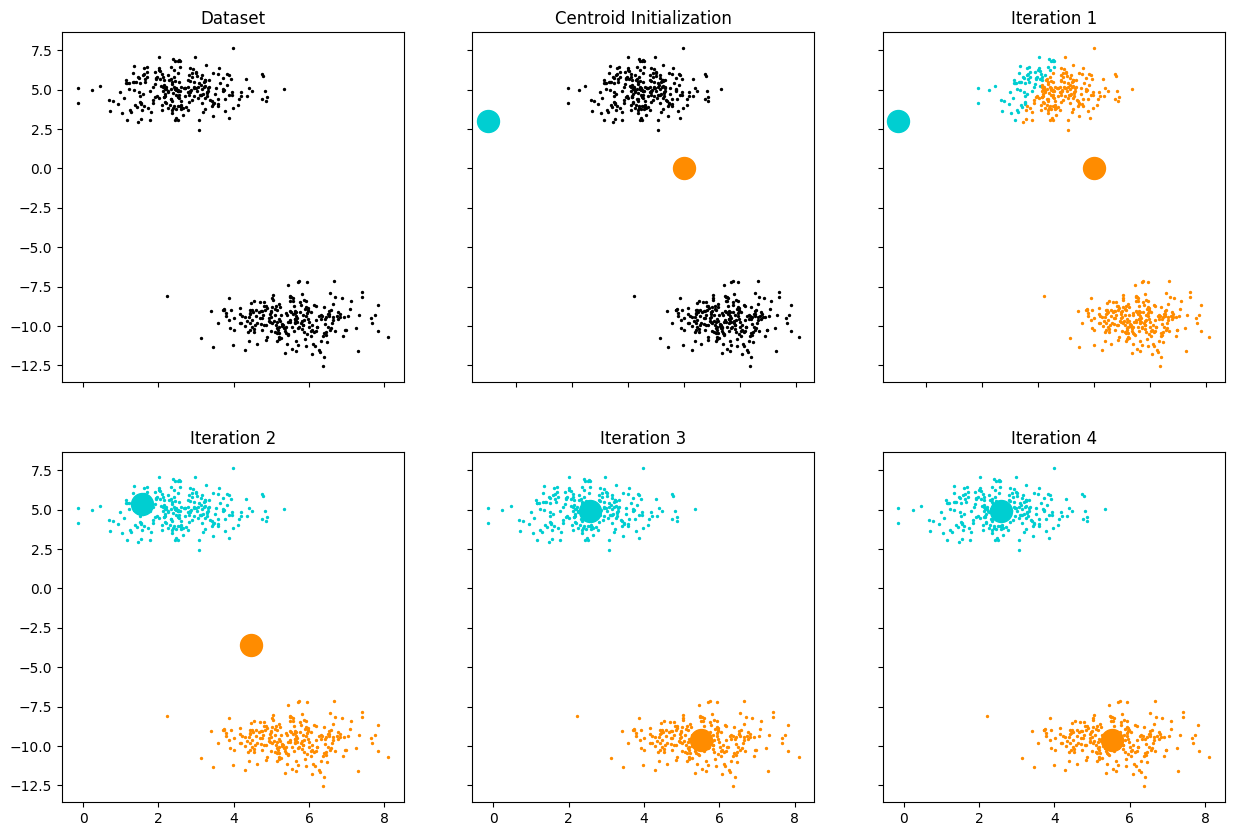

In [5]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(15, 10)
axs[0, 0].scatter(X[:,0],X[:,1], s = 2, c = 'black')
axs[0, 0].set_title('Dataset')

np.random.seed(1)
initializeClusterCentroids()

#Now, lets plot the centroids it has initalized
axs[0, 1].set_title('Centroid Initialization')
axs[0, 1].scatter(X[:, 0], X[:, 1], s = 2, c = 'black')
for i in range(k):#for all the clusters
    center = clusters[i]['center'] #its cluster's center
    axs[0, 1].scatter(center[0], center[1], c=clusters[i]['color'], s=250, marker="o")

#CLUSTERING EPOCH 1
axs[0, 2].set_title('Iteration 1')
assignPointsToCluster(clusters, X)
# print(distance_of_i)
plotclusters(clusters, axs[0, 2])
updateCluster(clusters)

#CLUSTERING EPOCH 2
axs[1, 0].set_title('Iteration 2')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 0])
updateCluster(clusters) 

#CLUSTERING EPOCH 3
axs[1, 1].set_title('Iteration 3')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 1])
updateCluster(clusters)

#CLUSTERING EPOCH 4
axs[1, 2].set_title('Iteration 4')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 2])
updateCluster(clusters)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


print(clusters)
print(distance)

Let us now try the same thing with different number of clusters. We will also see how initialization matters.

In [6]:
# Generating Synthetic Data

k=5
color=["darkturquoise","darkorange","teal","darkviolet","tomato", "yellowgreen","hotpink","gold"]

X,_=make_blobs(n_samples=500, n_features=2, centers=k, random_state=10)
print("Shape = " + str(X.shape))

print("Sample:")
print(X[:5])

Shape = (500, 2)
Sample:
[[-7.32786741  4.23641465]
 [ 1.12565931  6.32088416]
 [-0.49239887 -5.28550826]
 [-7.12432134  6.16236021]
 [ 2.38696269  4.11331935]]


this is distance of cluster from 2 points
[13.127089013346923, 14.262800715506566, 9.409454369770698, 8.622930246037967, 13.34601118783622]
clusters to choose
3
distance
[13.127089013346923, 14.262800715506566, 9.409454369770698, 8.622930246037967, 13.34601118783622]
this is distance of cluster from 2 points
[11.354597740220502, 14.365055935883273, 3.434056385648471, 4.322710977827448, 14.658017235338727]
clusters to choose
2
distance
[11.354597740220502, 14.365055935883273, 3.434056385648471, 4.322710977827448, 14.658017235338727]
this is distance of cluster from 2 points
[2.5086982876055504, 2.7587899646004734, 8.652265554020833, 7.436792652750871, 3.105048563867108]
clusters to choose
0
distance
[2.5086982876055504, 2.7587899646004734, 8.652265554020833, 7.436792652750871, 3.105048563867108]
this is distance of cluster from 2 points
[14.417056752010437, 15.853340381955228, 9.656798748093653, 9.128517940542718, 15.060913514558468]
clusters to choose
3
distance
[14.417056752010437, 15

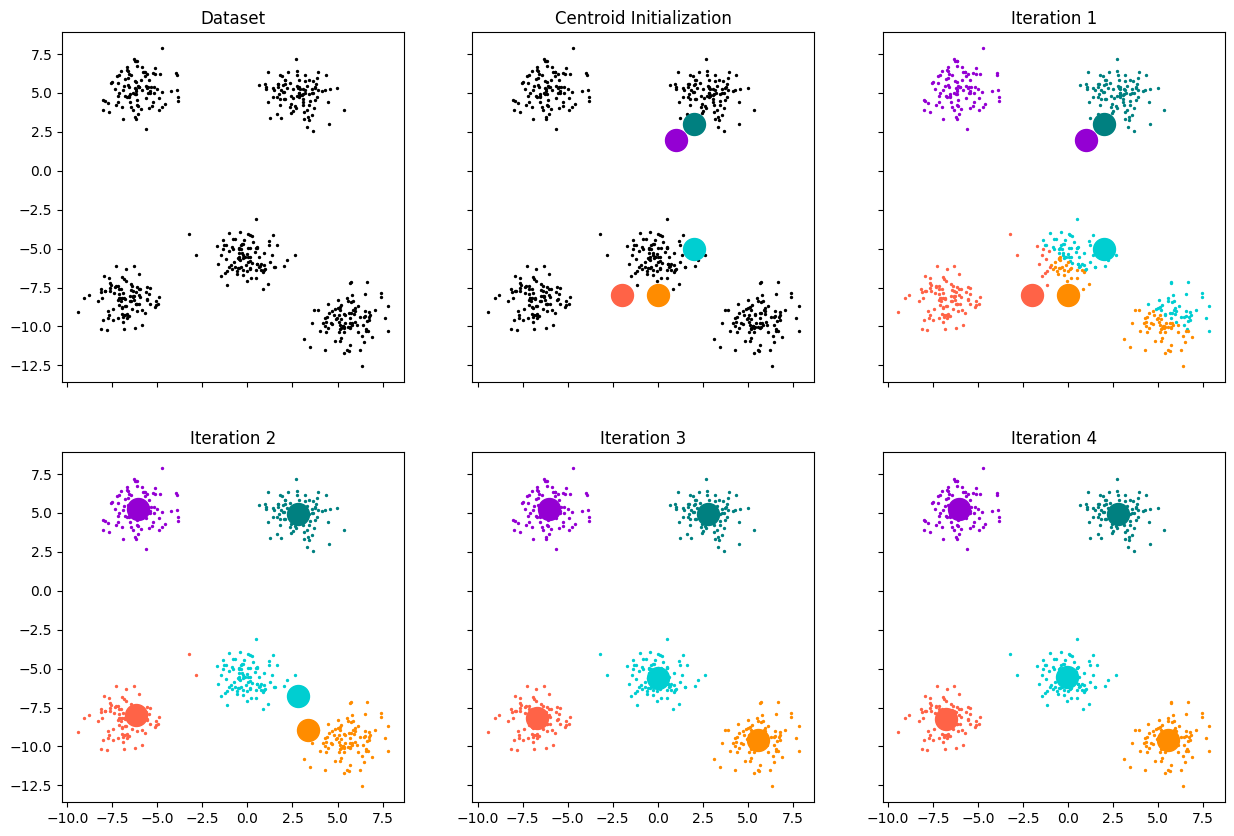

In [7]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(15, 10)
axs[0, 0].scatter(X[:,0],X[:,1], s = 2, c = 'black')
axs[0, 0].set_title('Dataset')

## Change initialization here to 'np.random.seed(0)'
np.random.seed(3)
initializeClusterCentroids()

#Now, lets plot the centroids it has initalized
axs[0, 1].set_title('Centroid Initialization')
axs[0, 1].scatter(X[:, 0], X[:, 1], s = 2, c = 'black')
for i in range(k):#for all the clusters
    center = clusters[i]['center'] #its cluster's center
    axs[0, 1].scatter(center[0], center[1], c=clusters[i]['color'], s=250, marker="o")

#CLUSTERING EPOCH 1
axs[0, 2].set_title('Iteration 1')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[0, 2])
updateCluster(clusters)

#CLUSTERING EPOCH 2
axs[1, 0].set_title('Iteration 2')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 0])
updateCluster(clusters)

#CLUSTERING EPOCH 3
axs[1, 1].set_title('Iteration 3')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 1])
updateCluster(clusters)

#CLUSTERING EPOCH 4
axs[1, 2].set_title('Iteration 4')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 2])
updateCluster(clusters)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

**As you can see, changing the random seed and hence changing the initialization has a large effect on the performance of KMeans.**

Hence our KMeans algo can be run by calling the following function with appropriate X (dataset)

In [8]:
from copy import deepcopy

def run_kmeans(k, X):
  initializeClusterCentroids()
  assignPointsToCluster(clusters, X)
  while (True):
    prev_clusters = deepcopy(clusters)
    updateCluster(clusters)
    assignPointsToCluster(clusters, X)
    if prev_clusters == clusters:
      break
  return clusters

### Kmeans in scikit-learn

Even though implementation of KMeans is easy, using libraries like sklearn allows our code to  be much simpler and faster. The next two cells show how to use it.

Check out all functionalities at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [9]:
from sklearn.cluster import KMeans

kmeans_demo = KMeans(n_clusters=5) #random centroid intialization
#kmeans_demo = KMeans() #What if we dont initialize the number of clusters?
#kmeans_demo = KMeans(n_clusters=5, init='k-means++') #Does smart centroid initialization help?

#Let us fit our synthetic datapoints into the kmeans object
kmeans_demo.fit(X)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [10]:
kmeans_demo.labels_.shape

(500,)

ITERATIONS TO CONVERGE = 2
CLUSTER CENTROIDS = 
[[-6.06533341  5.2400571 ]
 [-0.06909909 -5.56399319]
 [ 5.56873506 -9.60861515]
 [ 2.78561142  4.93182424]
 [-6.78567723 -8.26282547]]



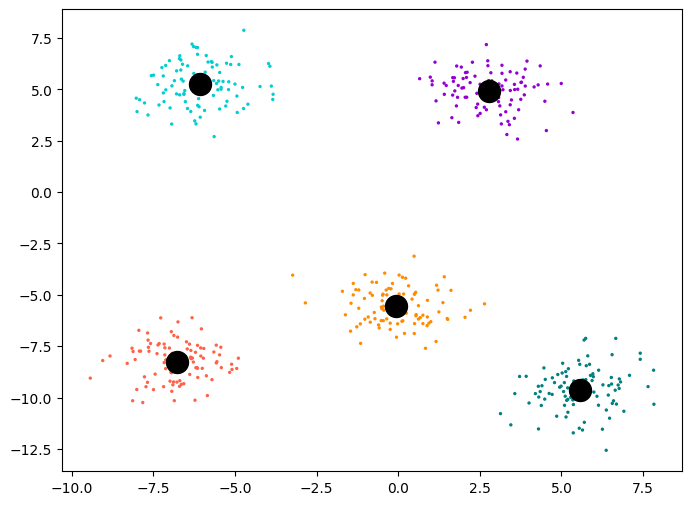

(500, 2)
(500,)
(500,)


In [11]:
#Lets inspect the clustering model
print("ITERATIONS TO CONVERGE = " + str(kmeans_demo.n_iter_))
print("CLUSTER CENTROIDS = ")
print(str(kmeans_demo.cluster_centers_))
print()

#using the colours we defined for the clusters at the start
colors_toplot = []
for label in kmeans_demo.labels_:
  colors_toplot.append(color[label])

plt.scatter(X[:,0], X[:, 1], c = colors_toplot, s=2)
plt.scatter(kmeans_demo.cluster_centers_[:,0], kmeans_demo.cluster_centers_[:,1], c = 'black', s=250, marker = "o")
plt.gcf().set_size_inches(8,6)
plt.show()
print(X.shape)
print(X[:,0].shape)
print(X[:, 1].shape)

### KMeans on Digits Dataset (KMeans for labelling)

Here we will attempt to use k-means to try to identify similar digits without using the original label information; this might be similar to a first step in extracting meaning from a new dataset about which you don't have any a priori label information.

In [12]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

(1797, 64)

In [17]:
digits.data.shape

(1797, 64)

In [25]:
from sklearn.cluster import KMeans

# Perform KMeans
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
print(clusters.shape)
print(clusters)
print()
print(kmeans.cluster_centers_.shape)
print()
print(kmeans.cluster_centers_)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(1797,)
[0 1 1 ... 1 8 8]

(10, 64)

[[ 0.00000000e+00  2.24719101e-02  4.25280899e+00  1.31629213e+01
   1.12471910e+01  2.92134831e+00  3.37078652e-02 -5.55111512e-17
   2.60208521e-18  8.87640449e-01  1.26629213e+01  1.33595506e+01
   1.13820225e+01  1.13483146e+01  9.66292135e-01  0.00000000e+00
   1.30104261e-18  3.74719101e+00  1.42078652e+01  5.19662921e+00
   2.09550562e+00  1.20955056e+01  3.53370787e+00 -6.93889390e-18
  -4.33680869e-19  5.31460674e+00  1.26348315e+01  2.01685393e+00
   2.30337079e-01  9.06179775e+00  6.46629213e+00 -8.67361738e-19
   0.00000000e+00  5.88202247e+00  1.14831461e+01  8.70786517e-01
   2.80898876e-02  8.78089888e+00  7.15730337e+00  0.00000000e+00
  -3.46944695e-18  3.52808989e+00  1.33033708e+01  1.58988764e+00
   1.41573034e+00  1.13258427e+01  5.85955056e+00  3.46944695e-18
   0.00000000e+00  8.08988764e-01  1.31685393e+01  9.92696629e+00
   1.03202247e+01  1.32921348e+01  2.48314607e+00  2.24719101e-02
  -2.16840434e-19  5.61797753e-03  4.21

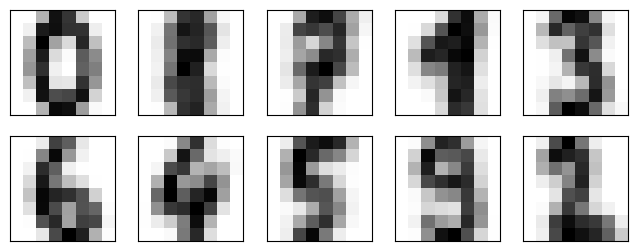

In [26]:
# We can now see how the centers of the clusters formed are

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Because k-means knows nothing about the identity of the cluster, the 0–9 labels may be permuted. We can fix this by matching each learned cluster label with the true labels found in them:

In [27]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

Now we can check how accurate our unsupervised clustering was in finding similar digits within the data:

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7918753478018921

**Hence clustering algorithms like KMeans are highly effective for identifying labels for groups apriori and even a simple KMeans acheives a ~80% accuracy on digit classification.**

The confusion matrix for this looks like:

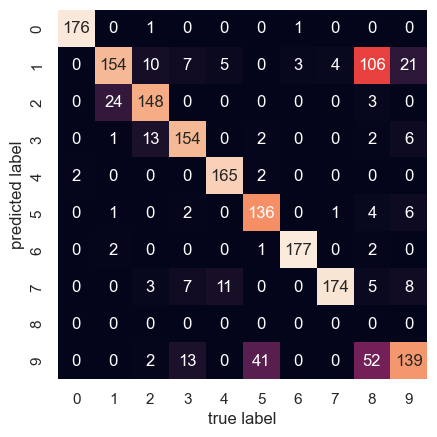

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### KMeans on Iris Dataset (Elbow Method)

We will perform KMeans on the famous Iris Dataset which has four features: sepal length, sepal width, petal length, and petal width. The fifth column is for species, which holds the value for these types of plants.

In [30]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn import datasets

In [40]:
#import the dataset
iris = datasets.load_iris()
print(iris.data[:10])
df = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
x = df.iloc[:, [0,1,2,3]].values
print(type(x))
df.head(5)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
<class 'numpy.ndarray'>


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [41]:
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

Let us start with assigning the initial number of clusters as k=5.

In [42]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5.shape)
print(y_kmeans5)

kmeans5.cluster_centers_

(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 2 4 4 4 2 4 2 2 4 2 4 2 4 4 2 4 2 4 2 4 4
 4 4 4 4 4 2 2 2 2 4 2 4 4 4 2 2 2 4 2 2 2 2 2 4 2 2 1 4 3 1 1 3 2 3 1 3 1
 1 1 4 1 1 1 3 3 4 1 4 3 4 1 3 4 4 1 3 3 3 1 4 4 3 1 1 4 1 1 1 4 1 1 1 4 1
 1 4]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [5.508     , 2.6       , 3.908     , 1.204     ],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [6.20769231, 2.85384615, 4.74615385, 1.56410256]])

How do we choose the optimal number of clusters? There’s a method called the Elbow method, which is designed to help find the optimal number of clusters in a dataset. So let’s use this method to calculate the optimum value of k. To implement the Elbow method, we need to create some Python code (shown below), and we’ll plot a graph between the number of clusters and the corresponding error value.

This graph generally ends up shaped like an elbow, hence its name:

K-Means: Inertia
Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid,
 squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters ( K ).

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

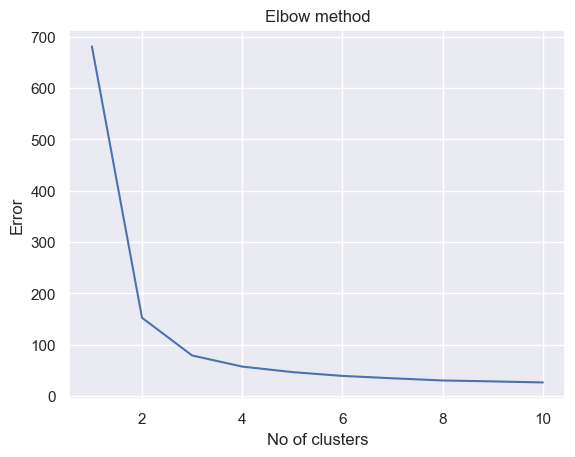

this is the error
[681.3706, 152.34795176035792, 78.85144142614601, 57.228473214285714, 46.44618205128205, 39.03998724608725, 34.40900974025975, 30.136360617452723, 28.35098940533151, 26.283304443234783]


In [45]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()
print("this is the error")
print(Error)

The output graph of the Elbow method shows that the shape of elbow is approximately formed at k=3. The optimal value of k is between 2 and 4, as the elbow-like shape is formed at k=3 in the above graph.

In [47]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)

kmeans3.cluster_centers_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

We can now visualize the clustering in two dimensions instead of the original four.

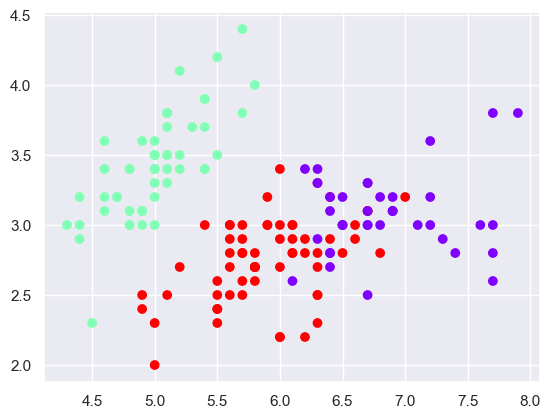

In [48]:
plt.scatter(x[:,0], x[:,1], c=y_kmeans3, cmap='rainbow')

## Points to think about

1. Is feature scaling essential for KMeans as it is for most ML algos? Explain.
2. What are ways to prevent initialization variation in KMeans?
3. What is the training and testing complexity of KMeans?

1 Answer

>Yes,Feature scaling is important for KMeans clustering, as it ensures all features contribute equally to the distance calculations performed 
during clustering. Without scaling, features with larger scales or variances could dominate the clustering process, 
leading to biased results. Scaling techniques like normalization  or standardization bring features to a similar scale,
preventing any single feature from having undue influence and allowing KMeans to create more accurate
and fair clusters.

2 Answer

> **Multiple Initializations:** Run the KMeans algorithm multiple times with different initial centroid placements and choose the clustering that gives the best result based on a predefined criterion (such as minimizing inertia or maximizing silhouette score).


> **KMeans++ Initialization:** Instead of randomly initializing centroids, use the KMeans++ algorithm for centroid initialization. KMeans++ selects initial centroids in a way that ensures they are distant from each other, which often leads to better convergence and more stable results.
Setting Random Seed: Set a random seed before running the KMeans algorithm. This ensures reproducibility by making the random initialization of centroids consistent across different runs.


> **Preprocessing Data:** Perform feature scaling or normalization on the data before running KMeans. Ensuring that the data is on a similar scale can reduce the sensitivity of the algorithm to the initial centroid placements.


> **Using Mini-Batch KMeans:** Mini-Batch KMeans is a variant of KMeans that updates cluster centroids using mini-batches of the data, which can make the algorithm less sensitive to initialization variation due to smaller batch sizes and quicker convergence.


> **Hierarchical Clustering Initialization:** Another approach involves using the results of hierarchical clustering to initialize centroids for KMeans. This method may provide better starting points for centroids.

3 Answer

The KMeans algorithm's complexity can be broken down into training and prediction (testing) phases:

**Training Complexity:**
The KMeans problem is solved using either Lloyd’s or Elkan’s algorithm. The average complexity is given by $$O(k \cdot n \cdot T)$$, where:
- $k$ is the number of clusters,
- $n$ is the number of samples, and
- $T$ is the number of iterations.

The worst-case complexity is given by $$O(n^{(k+2/p)})$$, where:
- $n$ is the number of samples, and
- $p$ is the number of features.

**Prediction (Testing) Complexity:**
The prediction phase of the KMeans algorithm involves assigning each data point to the nearest centroid. The complexity of this operation is $$O(k \cdot n)$$, where:
- $k$ is the number of clusters, and
- $n$ is the number of samples.

Note that these complexities assume that the dimensionality of the data is fixed. If the dimensionality increases, the time complexity can increase up to quadratic.

## References and resources

1. https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a
2. https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
3. https://en.wikipedia.org/wiki/K-means_clustering
4. https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
5. https://heartbeat.fritz.ai/k-means-clustering-using-sklearn-and-python-4a054d67b187

# Hierarchical Clustering

KMeans is an iterative process. It will keep on running until the centroids of newly formed clusters do not change or the maximum number of iterations are reached.

But there are certain challenges with K-means. It always tries to make clusters of the same size. Also, we have to decide the number of clusters at the beginning of the algorithm. Ideally, we would not know how many clusters should we have, in the beginning of the algorithm and hence it a challenge with K-means.

This is a gap hierarchical clustering bridges with aplomb. It takes away the problem of having to pre-define the number of clusters. Sounds like a dream! So, let’s see what hierarchical clustering is and how it improves on K-means.

## What is Hierarchical Clustering?

Let’s say we have the below points and we want to cluster them into groups:

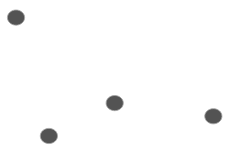

We can assign each of these points to a separate cluster:

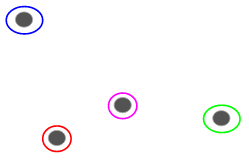

Now, based on the similarity of these clusters, we can combine the most similar clusters together and repeat this process until only a single cluster is left:

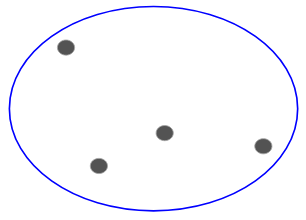

We are essentially building a hierarchy of clusters. That’s why this algorithm is called hierarchical clustering. I will discuss how to decide the number of clusters in a later section. For now, let’s look at the different types of hierarchical clustering.

## Agglomerative Hierarchical Clustering

In this technique, initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until one cluster or K clusters are formed.

The basic algorithm of Agglomerative is straight forward.

    Compute the proximity matrix
    Let each data point be a cluster
    Repeat: Merge the two closest clusters and update the proximity matrix
    Until only a single cluster remains

To understand better let’s see a pictorial representation of the Agglomerative Hierarchical clustering Technique. Lets say we have six data points {A,B,C,D,E,F}.

    Step- 1: In the initial step, we calculate the proximity of individual points and consider all the six data points as individual clusters as shown in the image below.

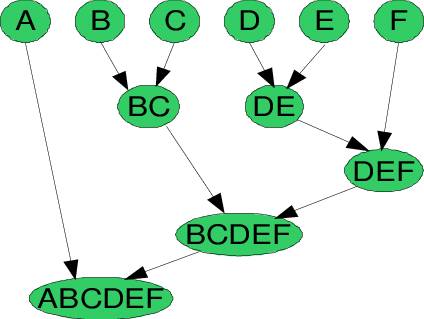

    Step- 2: In step two, similar clusters are merged together and formed as a single cluster. Let’s consider B,C, and D,E are similar clusters that are merged in step two. Now, we’re left with four clusters which are A, BC, DE, F.
    Step- 3: We again calculate the proximity of new clusters and merge the similar clusters to form new clusters A, BC, DEF.
    Step- 4: Calculate the proximity of the new clusters. The clusters DEF and BC are similar and merged together to form a new cluster. We’re now left with two clusters A, BCDEF.
    Step- 5: Finally, all the clusters are merged together and form a single cluster.

Here is what this process in action looks like.

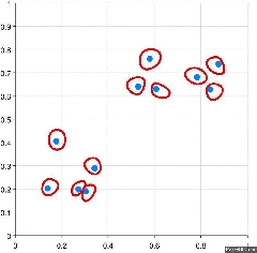

## Dendograms

A Dendrogram is a type of tree diagram showing hierarchical relationships between different sets of data.

As already said a Dendrogram contains the memory of hierarchical clustering algorithm, so just by looking at the Dendrgram you can tell how the cluster is formed.

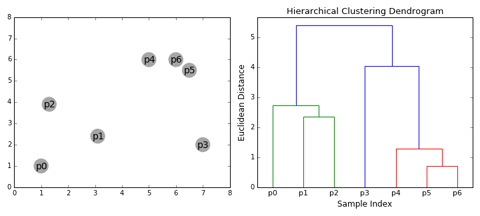



Note:-

    Distance between data points represents dissimilarities.
    Height of the blocks represents the distance between clusters.

So you can observe from the above figure that initially P5 and P6 which are closest to each other by any other point are combined into one cluster followed by P4 getting merged into the same cluster(C2). Then P1and P2 gets combined into one cluster followed by P0 getting merged into the same cluster(C4). Now P3 gets merged in cluster C2 and finally, both clusters get merged into one.

**How do you decide when to stop merging the clusters?**

You cut the dendrogram tree with a horizontal line at a height where the line can traverse the maximum distance up and down without intersecting the merging point.

For example in the below figure L3 can traverse maximum distance up and down without intersecting the merging points. So we draw a horizontal line and the number of verticle lines it intersects is the optimal number of clusters.

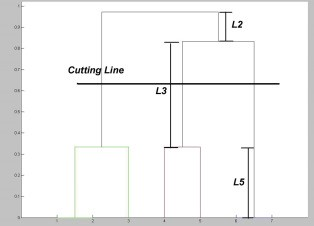

In [49]:
# load necessary files

!curl -L -o 'Mall_Customers.csv' 'https://drive.google.com/uc?export=download&id=1sgy48AZi0It6VBMQXTJbRLjlIg6E7HlY'
!curl -L -o 'Wholesale customers data.csv' 'https://drive.google.com/uc?export=download&id=1Jvqxa_KkjX8nZ5oxXe_6CzQ6aI3vVIZV'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  4286  100  4286    0     0   2321      0  0:00:01  0:00:01 --:--:--     0
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 15021  100 15021    0     0   9319      0  0:00:01  0:00:01 --:--:-- 18752


### Agglomerative Clustering on Mall Visitors Database

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Let's load the dataset

In [51]:
dataset = pd.read_csv('./Mall_Customers.csv')

In [52]:
X = dataset.iloc[:, [3, 4]].values

Next, we need to choose the number of clusters and for doing this we’ll use Dendrograms.

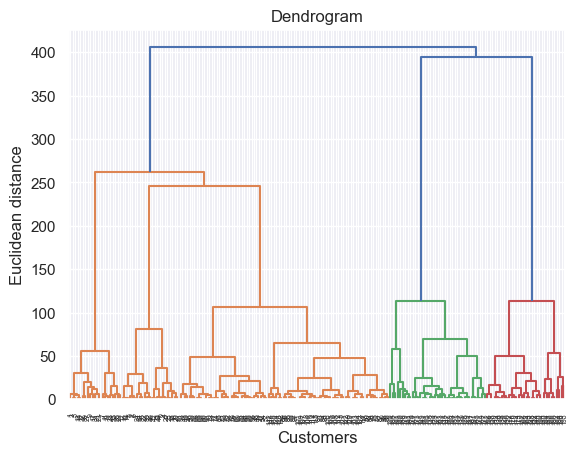

In [53]:
import scipy.cluster.hierarchy as sch
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

As we have already discussed to choose the number of clusters we draw a horizontal line to the longest line that traverses maximum distance up and down without intersecting the merging points. So we draw a horizontal line and the number of verticle lines it intersects is the optimal number of clusters.

In this case, it's 5. So let's fit our Agglomerative model with 5 clusters.

In [54]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Visualize the results.

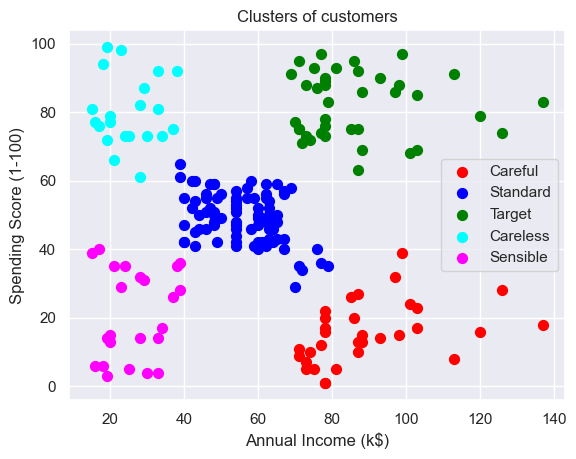

In [55]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Solving the Wholesale Customer Segmentation problem using Hierarchical Clustering

We will be working on a wholesale customer segmentation problem. The aim of this problem is to segment the clients of a wholesale distributor based on their annual spending on diverse product categories, like milk, grocery, region, etc.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
data = pd.read_csv('./Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [58]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


Different types of linkages -

1. 'ward’ minimizes the variance of the clusters being merged.

2. ‘average’ uses the average of the distances of each observation of the two sets.

3. ‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.

4. ‘single’ uses the minimum of the distances between all observations of the two sets.

Let us visualize the different types of linkages.



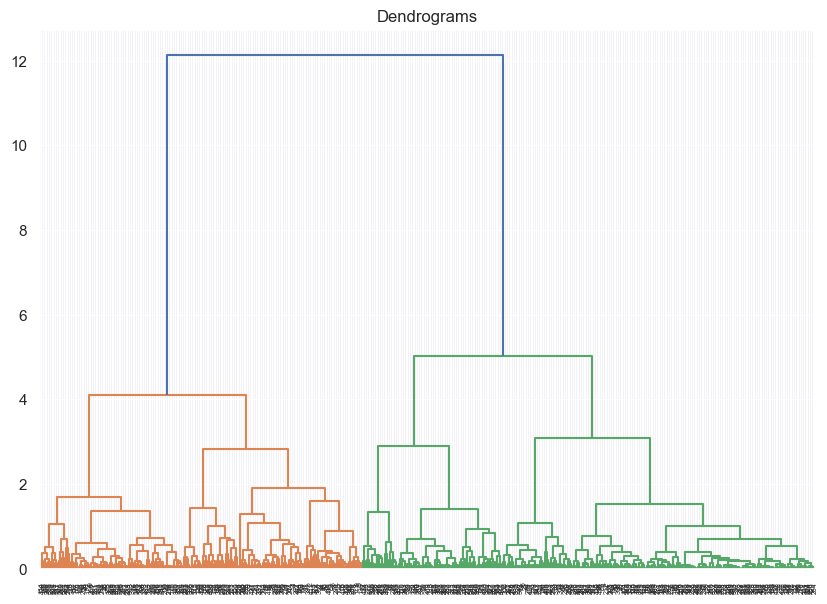

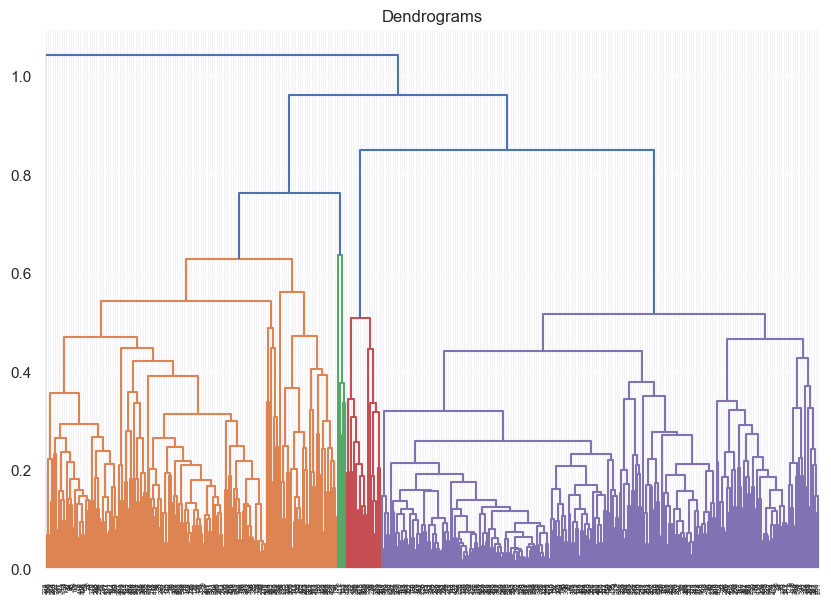

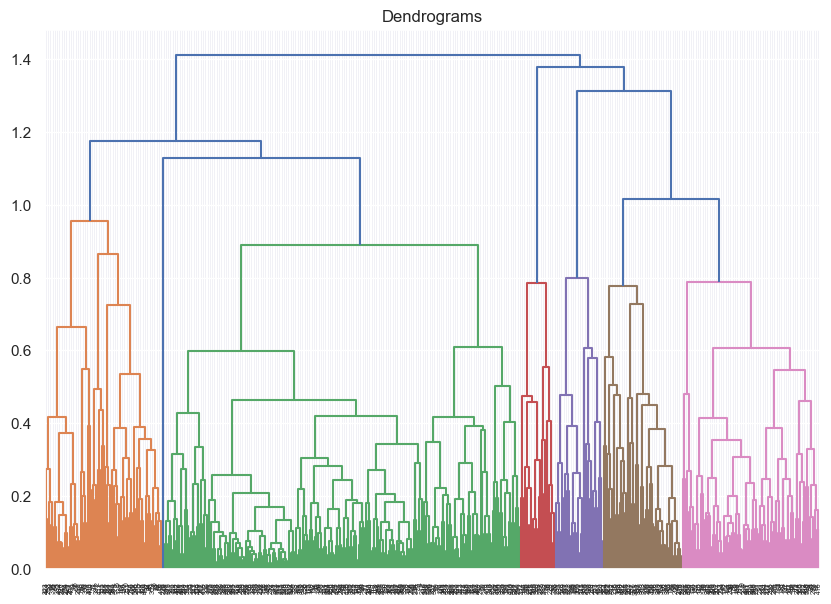

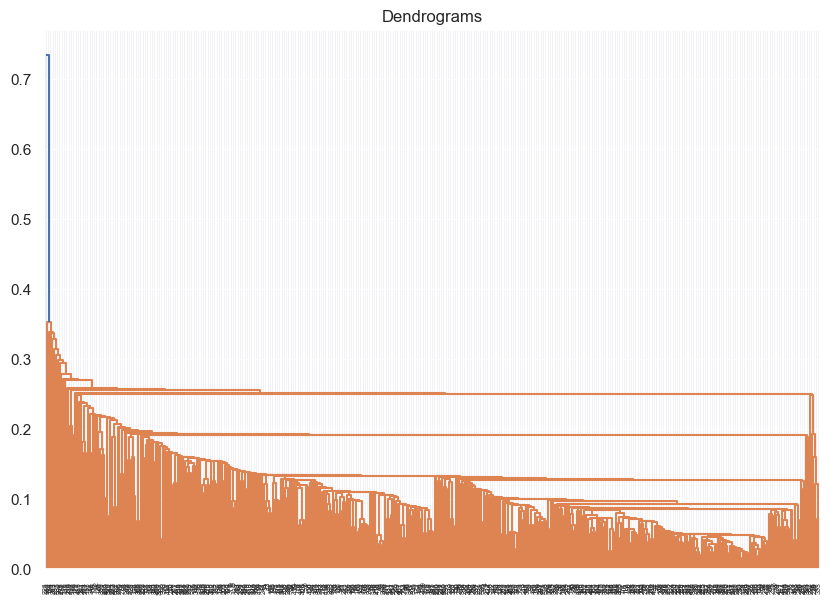

In [59]:
import scipy.cluster.hierarchy as shc
linkages = ['ward', 'average','complete','single']
for linkage in linkages:
  plt.figure(figsize=(10, 7))
  plt.title("Dendrograms")
  dend = shc.dendrogram(shc.linkage(data_scaled, method=linkage))

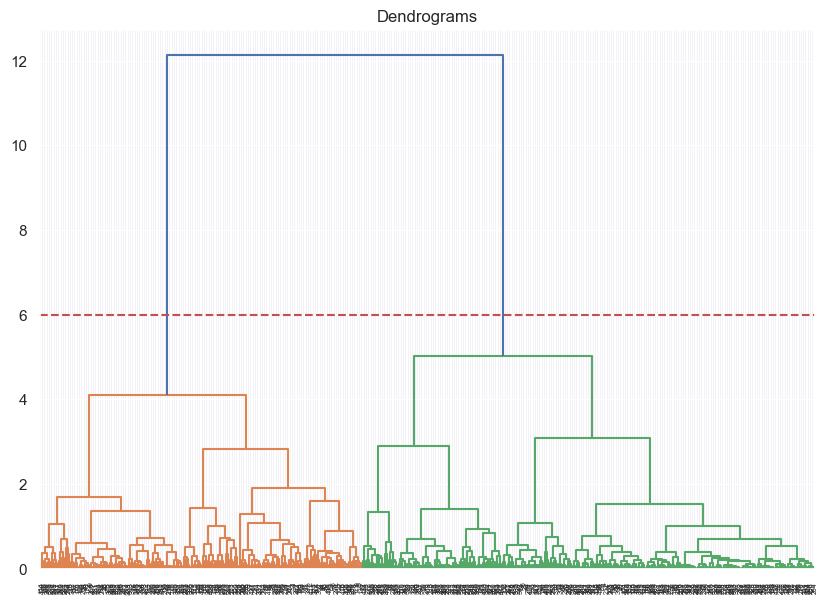

In [60]:
threshold = 6 #@param {type:"slider", min:0, max:100, step:1}

plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=threshold, color='r', linestyle='--')

In [61]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_scaled)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

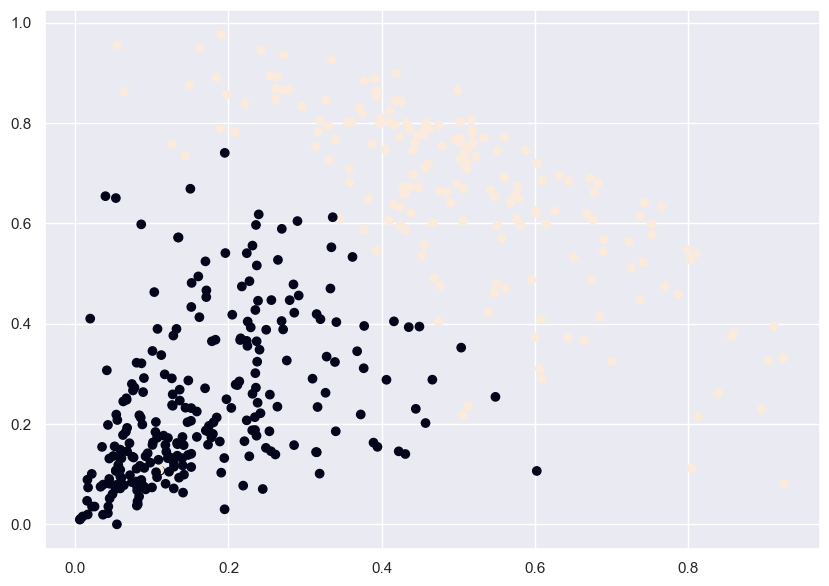

In [62]:
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_)

## Divisive Hierarchical Clustering

In Divisive or DIANA(DIvisive ANAlysis Clustering) is a top-down clustering method where we assign all of the observations to a single cluster and then partition the cluster to two least similar clusters. Finally, we proceed recursively on each cluster until there is one cluster for each observation. So this clustering approach is exactly opposite to Agglomerative clustering.

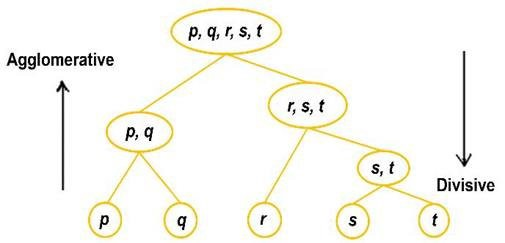

There is evidence that divisive algorithms produce more accurate hierarchies than agglomerative algorithms in some circumstances but is conceptually more complex.

In both agglomerative and divisive hierarchical clustering, users need to specify the desired number of clusters as a termination condition(when to stop merging).

Divisive clustering methods are fairly complicated to implement, so we will not do that here. You can check out open source implementations like https://github.com/div338/Divisive-Clustering-Analysis-Program-DIANA- for further details.

## Excercises

1. What is the need for hierarchical clustering and its advantages over KMeans?
2. What is the advantages of Density Based Clustering over KMeans?

1 Answer

> Hierarchical clustering is a method used to group similar data points into clusters that form a hierarchical structure. Unlike KMeans, which partitions the data into a fixed number of non-overlapping clusters, hierarchical clustering organizes the data into a tree-like or dendrogram structure where clusters at different levels of granularity are formed.

The need for hierarchical clustering arises due to several reasons:

1.No need to specify the number of clusters beforehand

2.Understanding cluster relationships at different scales

3.Interpretability and visualization

4.Flexibility in cluster extraction

5.Handling non-globular clusters

> **Advantages of hierarchical clustering over KMeans:** 

Does not require the number of clusters to be predefined.

Provides a dendrogram for visual interpretation.

Can handle non-globular clusters.

Allows exploration of different clustering solutions at multiple levels of granularity.

Generally less sensitive to initialization issues.

2 Answer

Density-Based Clustering and K-Means are two popular clustering algorithms in machine learning. Here are some advantages of Density-Based clustering over K-Means:<br>
<br>
Arbitrary Shapes: <br>Density-Based can find clusters of arbitrary shapes and sizes, unlike K-Means which assumes spherical clusters.<br>
<br>
Handling Outliers: <br>Density-Based is robust to noise and outliers since they are not assigned to any cluster. In contrast, K-Means can stumble on certain datasets where outliers might get their own cluster instead of being ignored.<br>
<br>
No Need to Specify Cluster Number: <br>In Density-Based, the number of clusters need not be specified, which is a requirement in K-Means.<br>
<br>
Density-Based Clustering: <br>Density-Based uses the concept of reachability i.e., how many neighbors a point has within a radius. This corresponds more to human intuitions of clustering, rather than distance from a central clustering point as in K-Means.<br>
<br>
Handling Varying Densities: <br>Density-Based can handle data where clusters are of varying sizes and density. K-Means has trouble clustering data where clusters are of varying sizes and density.<br>

## Conclusion


Hierarchical clustering is a very useful way of segmentation. The advantage of not having to pre-define the number of clusters gives it quite an edge over k-Means. However, it doesn't work well when we have huge amount of data.

## Resources and References

1. https://en.wikipedia.org/wiki/Hierarchical_clustering
2. https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/
3. https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec
4. https://www.kdnuggets.com/2019/09/hierarchical-clustering.html